In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [52]:
wine=pd.read_csv('winequality-red.csv')

In [53]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [63]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [54]:
wine.shape

(1599, 12)

In [64]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


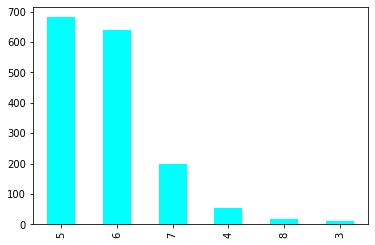

In [72]:
wine['quality'].value_counts().plot.bar(color='cyan')

In [89]:
from collections import Counter
Counter(wine['quality'])

Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})

([<matplotlib.patches.Wedge at 0x1c670a2c160>,
 [Text(0.5075885136176095, 2.1406433380746703, '5'),
  Text(-1.5518097107013993, -1.5594507436186755, '6'),
  Text(1.6694494845062682, -1.4328078791944705, '7'),
  Text(2.1497439794837754, -0.46754766887801047, '4'),
  Text(2.1938714019596497, -0.16409835972245979, '8'),
  Text(2.199575397837407, -0.04322116643977899, '3')])

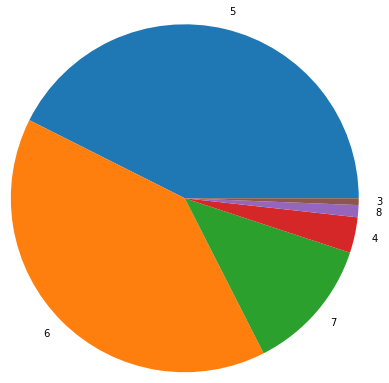

In [102]:
Quality_count=[681,638,199,53,18,10]
Quality_labels=['5','6','7','4','8','3']
plt.pie(Quality_count,labels=Quality_labels,radius=2)

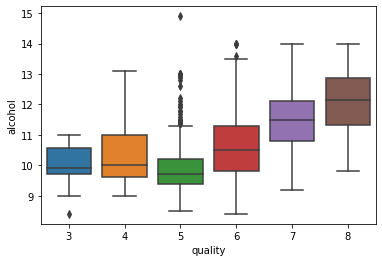

In [108]:
sns.boxplot(x='quality',y='alcohol',data=wine)

In [70]:
corr=wine.corr()

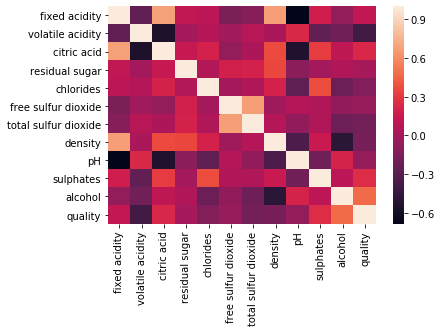

In [71]:
sns.heatmap(corr)

In [55]:
X=wine.drop('quality',axis=1)
y=wine['quality']

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

In [57]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=5)

In [58]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [59]:
y_pred=dt.predict(X_test)

In [60]:
from sklearn.metrics import r2_score

In [61]:
r2_score(y_test,y_pred)

0.09142355351741638

In [83]:
prediction=pd.DataFrame(list(zip(y_test,y_pred)),columns=['Test','Predict'])

In [84]:
prediction

,Test,Predict
0,6,6.0
1,4,3.0
2,5,5.0
3,6,8.0
4,5,6.0
5,5,5.0
6,5,5.0
7,7,7.0
8,5,5.0
9,5,5.0
